# 3. Preprocessing

## There are a lot of options, some helpful and some less 
We will focus on the basics, but later if you want to chat more _outlandish_ methods I am happy to. Presently we will focus on:
- Quality control (QA)
- Distortion correction
- Slice timing correction
- Motion correction
- Spatial smoothing

## Quality Control

Look at your images! Make sure your imaging center is performing routine checks. Usual artifacts you will see are:
- Striping
-- Could be due to spiking
- Ghosting (especially if you have a population that moves alot)
-- Offset in the K space in EPI acquisition 
-- AKA you don't know where the data is in space

## MRQC
https://github.com/poldracklab/mriqc

## No matter what there is no substitution for looking at your images. 

## Concept Check: Looking at good and bad images

need data to look at here maybe some QA reports

## Distortion correction

Often times refered to as 'Drop Out'. This is due to B0 field inhomogeneties. These are common near air ways (like the sinus cavity). 

### Backup: What is B0?
B0 = The external magnetic field  
We use the RF pulse to 'knock' protons either 90 or 180 degrees, as they relax we measure the radiowaves they emit. We assume B0 is perfect, but like us, it never is. We can get around this by measuring B0 and mapping where it is no homogenous. 

![B0](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/B0.gif?raw=true)


# Concept Check:
What scan can we run to measure B0?

# FIELDMAP

## fMRIPREP B0 correction 
### What they call Susceptibility Distortion Correction (SDC)

https://fmriprep.readthedocs.io/en/stable/sdc.html

They do a very lovely job and mostly take all the confusion out of it.... if you know how to get fMRIPREP to work. 

## Correction methods (from fMRIPREP)
1. Phase Encoding POLARity (PEPOLAR) techniques (also called blip-up/blip-down): acquire at least two images with varying PE directions. Hence, the realization of distortion is different between the different acquisitions. The displacements map 𝑑PE(𝑥,𝑦,𝑧) is estimated with an image registration process between the different PE acquisitions, regularized by the readout time 𝑇ro. Corresponds to 8.9.4 of BIDS.  
 - Translation: You have two EPI (functional images) in different phase encoding directions. Compare the two directions and see where it is different.
2. Direct B0 mapping sequences: some sequences (such as SE) are able to measure the fieldmap Δ𝐵0(𝑥,𝑦,𝑧) directly. Corresponds to section 8.9.3 of BIDS. 
 - Translation: Measure the field map directly with a higher order shim. (This is then applied to all your other images and you avoid having to re-shim before each EPI). FMRIPREP takes the image and then masks it with the magnitude image (thus why the skull strip is so important)

3. Phase-difference B0 estimation: to estimate the fieldmap Δ𝐵0(𝑥,𝑦,𝑧), these methods measure the phase evolution in time between two close GRE acquisitions. Corresponds to the sections 8.9.1 and 8.9.2 of the BIDS specification.  
 - Translation: Take two back to back gradient echo sequences and compare the phase drift.  You find the GRE in the T2* images. More (and better) explanation here http://mriquestions.com/gradient-echo.html

4. Fieldmap-less estimation (experimental): FMRIPREP now experimentally supports displacement field estimation in the absence of fieldmaps via nonlinear registration.  
 - This is honestly what blew me away with fMRIPREP. The experimental fieldmap estimation does an astonishingly good job. This is using FNIRT (non-linear estimation) to correct for articfacts. We will touch back on this in the registration topic

5. Point-spread function acquisition: Not supported by FMRIPREP.

## Concept check: T2* That sounds familiar? .... What do we usually refer to as the T2*?

# BOLD sequences are frequently refered to as T2*
Though here are many T2* sequences and using a 180 degree pulse will eliminate dephasing levaing only the "true" T2 image
Excellent paper on the topic: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799958/

## B0 correction in FSL Fugue and Prelude
What you need (Siemens):
- Phase image
- Magnitude image (brain extracted - see note below)
- Difference of Echo Times - this is a sequence parameter that your scanner operator/radiographer/technician should know, but make sure you record the value

These are the typical field map images you generally generate. 

![FM_mag](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/fieldmap_mag.png?raw=true)

![FM_pd](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/fieldmap_phase_difference.png?raw=true)


Artefacts are compensated by  
1. geometrically unwarping the EPI images, and  
2. applying cost-function masking in registrations to ignore areas of signal loss  

## Issues with fieldmaps
- If it is a bad fieldmap it isn't going to help. Good to check if there are distortions in the fieldmap. 
- Sometimes it just isn't enough. You need good registation and motion correction

## Slice timing correction
We can't aquire all slices at once, but our model assumes they all are collected at once.  
_All images from Jeannette Mumford's MRI class at UT Austin_ 

## Concept check: What is a TR?

## TR= Repition time
The time it takes to image the entire field of view (often the entire brain). How many slices can you get per TR? How do you know that one slice doesn't 'bleed' into the next?

![tr_image](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/slicetime.png?raw=true)

![shift](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/shift.png?raw=true)

![interpolate](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/interpolate.png?raw=true)

## Issues with slice timing correction:
- One bad point, is now spread across the data.  
- Not great if you have a high motion task/population
- Usually used for event related designs (but again think about the motion)

## Skip slice time?
This is a study specific choice point. If you are using a TR >= 2 with interleaved aquisition, you might not need it. Especially with a block design. 
Adding temporal derivatives is probably a better bet.  
Want to really dive into slice timing check out this resource: http://mindhive.mit.edu/node/109

## Motion correction

### Types of motion 
Physiological motion  
- breathing
- cardiac

Head motion  
- prospective
- retrospective   

### Physiological motion
Generally low frequency (< 0.01Hz) 

### Concept Check: What kind of scan can be most vulerable to physiological motion? 

## Resting state
since we are often interest in lower frequency ranges (0.01 - 0.1 Hz). However, with BOLD there is the unfortunate problem of the cardiac and respiratory noise being correlated with BOLD response...

Ways to correct on the front end:  
- Breath hold
- Respiratory/cardiac gating  
- Measure pulse

Ways to correct on the back end:
- Temportal filtering
- Regress motion parameters
- CompCor (PCA, where the voxels with high variability are converted to a set of linearly uncorrelated values)  
- ICA (tough to tell what is signal and noise)

### Head motion  
- prospective
- retrospective 

#### Prospective
Usually called something like PACE. 
_THIS IS STANDARD AT BRIC UNLESS YOU TELL THEM TO TURN IT OFF_   
This will measure the motion and update the sequence. This sounds lovely until someone moves a lot, then you can lose data. This is getting better with improved tech. However, with PACE you cannot also get uncorrected images. For resting state PACE maybe more advantagous, however I (personal opinion) would rather have my raw task images.
Good paper: https://www.sciencedirect.com/science/article/pii/S1053811916306218

## Retrospective (MCFLIRT, DVARS, FD)
Both FSL and fMRIPREP use MCFLIRT to estimate head motion and generate 6-parameters:
- 3 rotations
- 3 translations  

In the fMRIPREP confounds file you will see the following:
- trans_x 
- trans_y 
- trans_z 
- rot_x   
- rot_y   
- rot_z

You can then create confound explanatory variables (EVs) from these and feed them into your model as EVs of no interest.

# MCFLIRT
## Purpose  
Align each voxel with subsequent voxels in the timeseries.  
## How  
Register each frame with 6 degrees of freedom to a reference image. 
## Output
Plot of how much each frame needed to be adjusted to the reference image overtime. 

This section is from "Single session analysis using FEAT!" By David Field https://slideplayer.com/slide/3992261/

## Concept check: What is the default reference image? 

## The median image in the timeseries
What are some pros and cons?


![rot](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/rot.png?raw=true)


![trans](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/trans.png?raw=true)


![total](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/total_dis.png?raw=true)

Relative displacement is head position at each time point relative to the previous time point. Absolute displacement is relative to the reference image.

Why should you be particularly concerned about high values in the relative motion plot?

The first thing to do is look at the range of values plotted on the y axis, because MCFLIRT auto-scales the y axis to the data range

## What this looks like in fMRIPREP
![mc_fp](https://fmriprep.readthedocs.io/en/stable/_images/sub-01_task-mixedgamblestask_run-01_bold_carpetplot.svg)

Personally I find the carpet plot confusing but some people love it. I am sad that fMRIPREP doesn't produce the MCFLIRT plots. But wait you say! The data to create them is available!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
fp_df=pd.read_csv(os.path.join(basepath,'sub-001_ses-1_task-resting_bold_confounds.tsv'), sep='\t')

fp_df.columns

Index(['CSF', 'WhiteMatter', 'GlobalSignal', 'stdDVARS', 'non-stdDVARS',
       'vx-wisestdDVARS', 'FramewiseDisplacement', 'tCompCor00', 'tCompCor01',
       'tCompCor02', 'tCompCor03', 'tCompCor04', 'tCompCor05', 'aCompCor00',
       'aCompCor01', 'aCompCor02', 'aCompCor03', 'aCompCor04', 'aCompCor05',
       'Cosine00', 'Cosine01', 'Cosine02', 'NonSteadyStateOutlier00', 'X', 'Y',
       'Z', 'RotX', 'RotY', 'RotZ'],
      dtype='object')

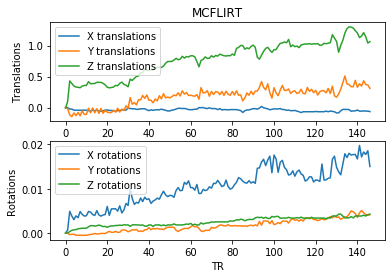

In [30]:
x = np.array(fp_df.index)
Xt = np.array(fp_df['X'])
Yt = np.array(fp_df['Y'])
Zt = np.array(fp_df['Z'])

Xr = np.array(fp_df['RotX'])
Yr = np.array(fp_df['RotY'])
Zr = np.array(fp_df['RotZ'])

plt.subplot(2, 1, 1)
plt.plot(x, Xt, label='X translations')
plt.plot(x, Yt, label='Y translations')
plt.plot(x, Zt, label='Z translations')
plt.title('MCFLIRT')
plt.ylabel('Translations')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, Xr, label='X rotations')
plt.plot(x, Yr, label='Y rotations')
plt.plot(x, Zr, label='Z rotations')
plt.xlabel('TR')
plt.ylabel('Rotations')
plt.legend()
plt.show()



## What about the mean and relative displacement?
https://www.jiscmail.ac.uk/cgi-bin/webadmin?A2=fsl;7495d5.05  
rmsdiff, which calculates
the average mm displacement between two transformations
over a spherical, brain-sized region of interest.
The absolute displacement compares the transformation
matrix at timepoint N with that of the reference timepoint,
while the relative displacement compares timepoints N and
N+1.

Usage: rmsdiff matrixfile1 matrixfile2 refvol [mask]
        Outputs rms deviation between matrices (in mm)

## Remember compcor? concept check: what is compcor?

![compcor](https://fmriprep.readthedocs.io/en/stable/_images/sub-01_task-rest_compcor.svg)

## Not using fMRIPREP? No problem
You can just run mcflirt through a FEAT or the command line in FSL. 

## How much motion is bad?
This is a pretty big question and unfortunately everyone has a different metric. 
Some research has found sample size is more important than thresholds
![n_motion](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/weird/4dock/images/n_motion.png?raw=true)
Others suggest http://mvpa.blogspot.com/2017/05/task-fmri-motion-censoring-scrubbing-2.html
FD > 0.9 should be regressed out. 

But what about the 6 motion regressors, their derivatives? their squares? ALL OF IT
![moreg](https://1.bp.blogspot.com/-Ro4tjkob9tA/WAFcfjHrRSI/AAAAAAAABDU/gucEDT-5qKAX-xQSD8eR2U8IVH23tzr2QCLcB/s1600/TENTs.jpg)
Personal opinion = Mo Regressors Mo Problems. 
I stick with the 6 motion regressors and derivatives (12 df) and my fd regressor (lucky 13 df!)
For resting state this is generally more strict and you may want the full 24 regressors.

A lot of folks use a total displacement (mm) metric as well. I would look to the population you are studying and if you are doing resting vs. task. Generally you ca get away with 1-3mm in task, would keep it well below 1mm in resting.

## SO you ran MCFLIRT, the best way to assess the data?

# Open in fsleyes and look at the difference!

# Final note: You can only run motion correction once. If you do motion correction on top of motion correction you will start messing up the signal

## Spatial smoothing

## Why? 
- Data is spatially noisy! Everything is close to each other. Smoothing minimizes these small differences and improves signal to noise ratio
- Also improves the anatomical registration (we smooth over little imperfections)
- A silver lining is that this noise is essentially (and assumed to be) RANDOM
- Therefore we can estimate a distribution and use it to smooth the image
- We literally do this all the time on instagram

## Whoa.... what are the drawbacks
- If you are interested in an area of activation smaller than your smoothing parameter you are gonna be out of luck (looking at hypothalamus peeps)

![v](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/voxels.png?raw=true)
![v2](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/voxels2.png?raw=true)
- FSL asks you to specify a Gaussian smoothing kernel defined by its Full Width at Half Maximum (FWHM) in mm
- To find the FWHM of a Gaussian
 -- Find the point on the y axis where the function attains half its maximum value
 -- Then read off the corresponding x axis values
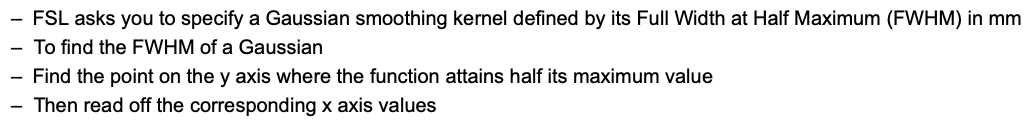

![gau](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/smoothmove.png?raw=true)

# Concept check: In the image above how big is the smoothing kernel?

# How do I choose a smoothing parameter?
Again this is field specific. But some rules of thumb I have seen:
- Use the default in FSL
- Less than the strength of your activation
 -- Have to have an a priori notition of activation strength. Good if you are replicating results
- Voxel size * 2 